<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/kaggle/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-02-04

### CNN Architectures - kaggle
### https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl 참고
### https://wooono.tistory.com/233 참고

#### 1. VGG16

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

In [ ]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

img1 = "dogs-vs-cats-redux-kernels-edition/train/cat.11679.jpg"
img2 = "dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg"
img3 = "dogs-vs-cats-redux-kernels-edition/train/cat.11679.jpg"
img4 = "dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg"
imgs = [img1, img2, img3, img4]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

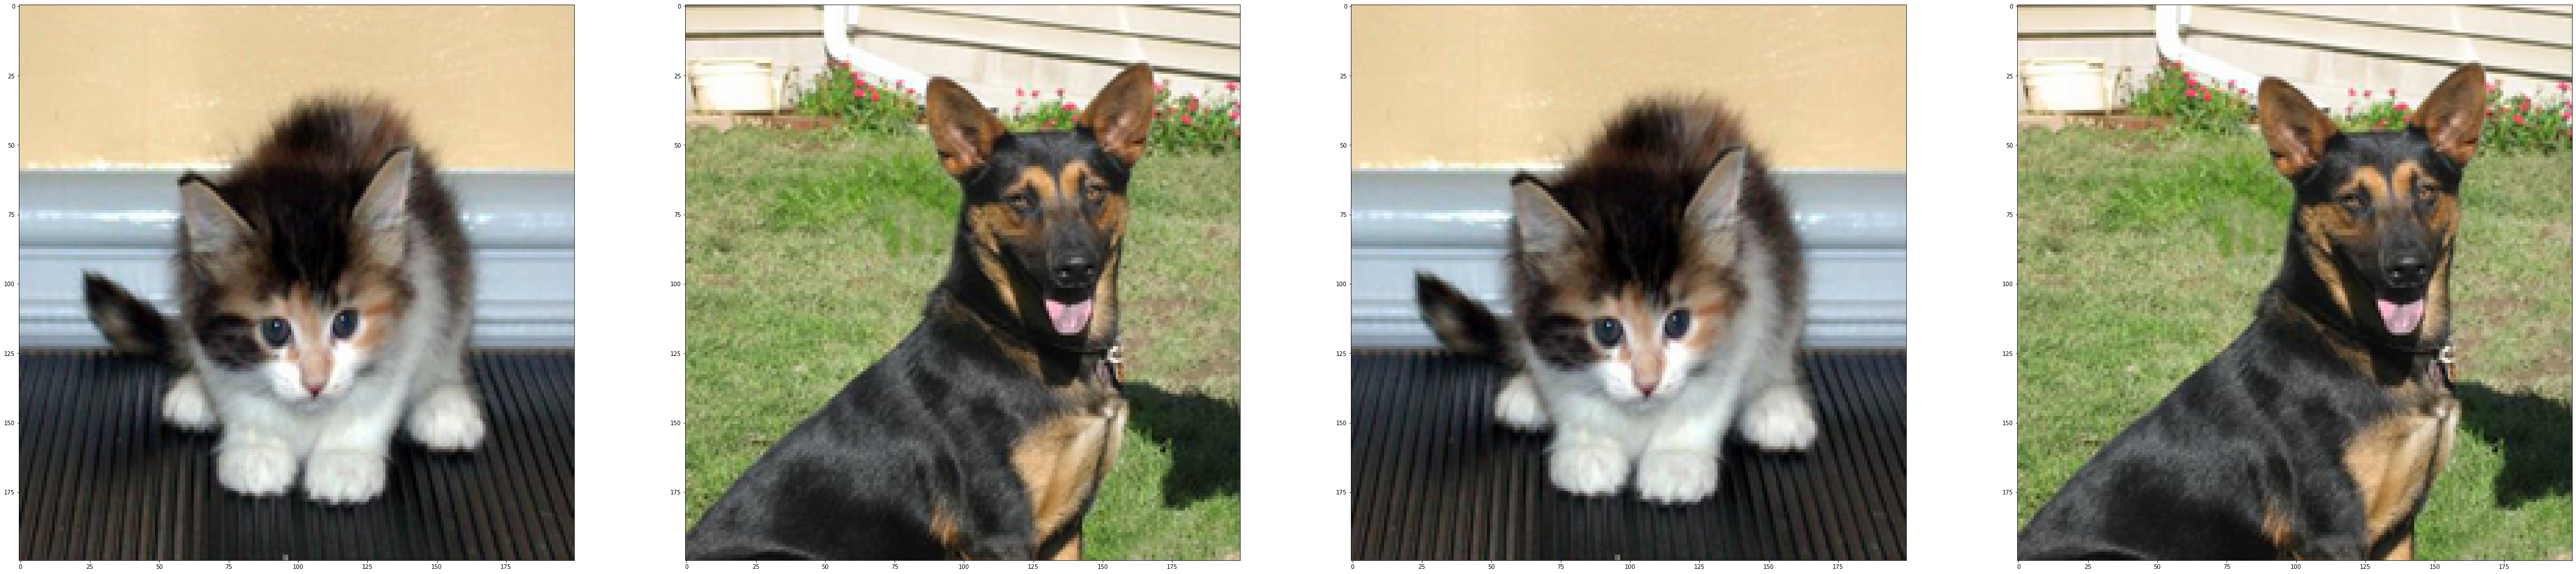

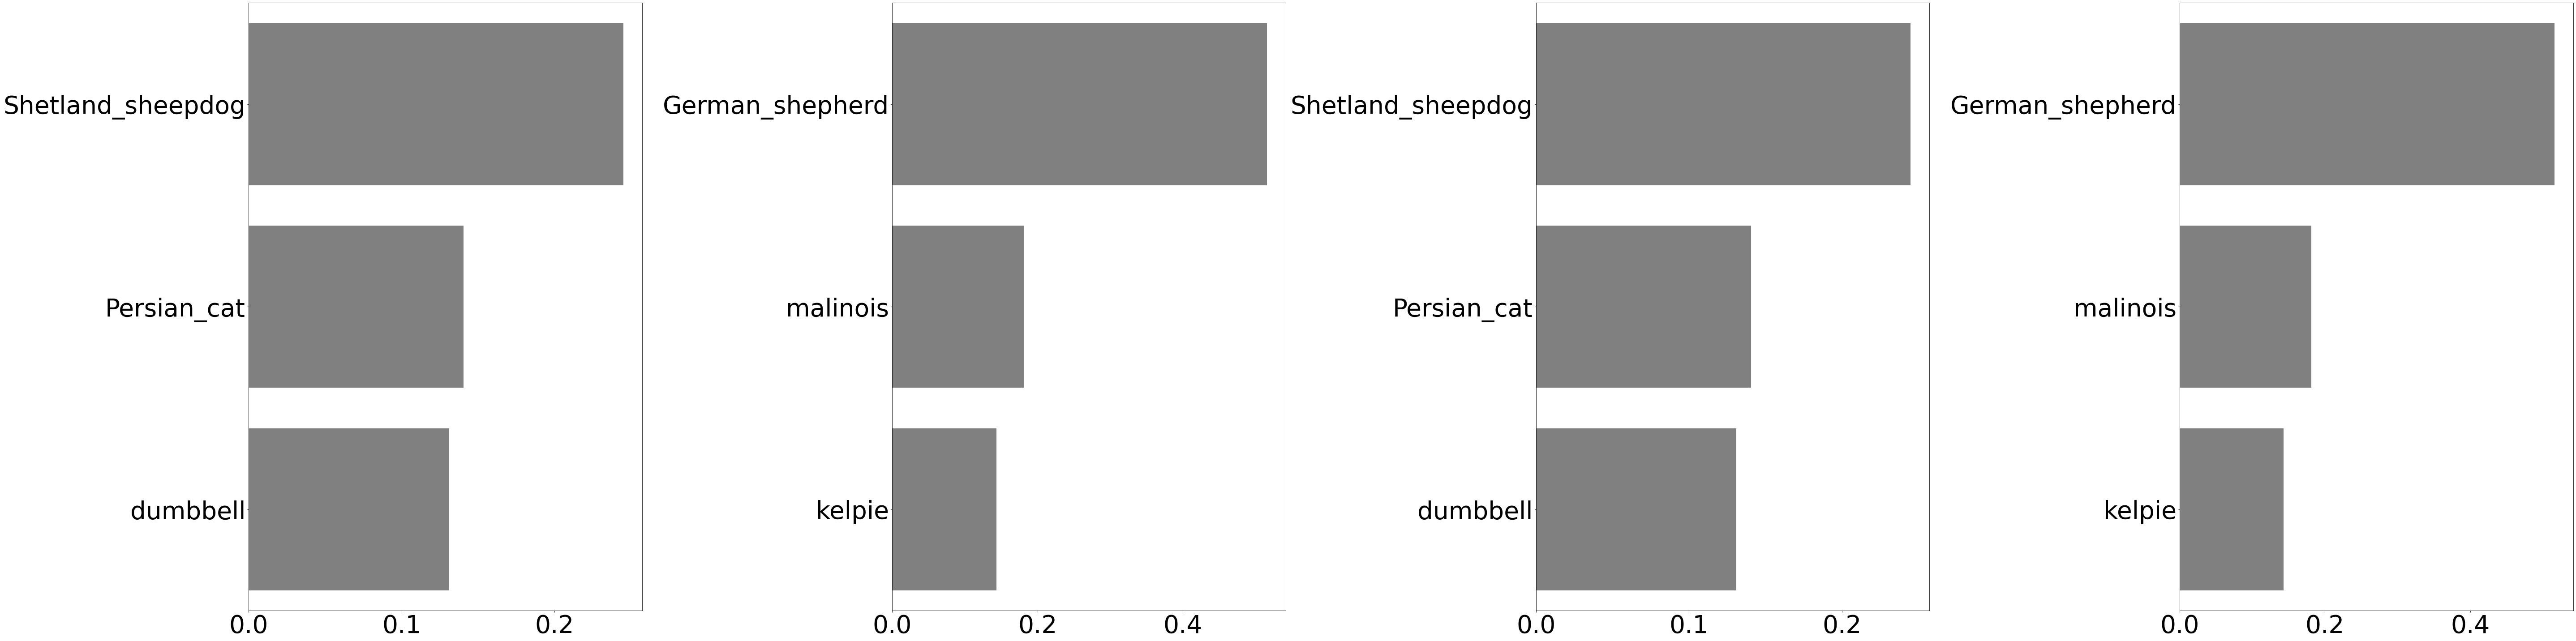

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16_weights = 'dogs-vs-cats-redux-kernels-edition/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights=vgg16_weights)
_get_predictions(vgg16_model)

#### 2. VGG19

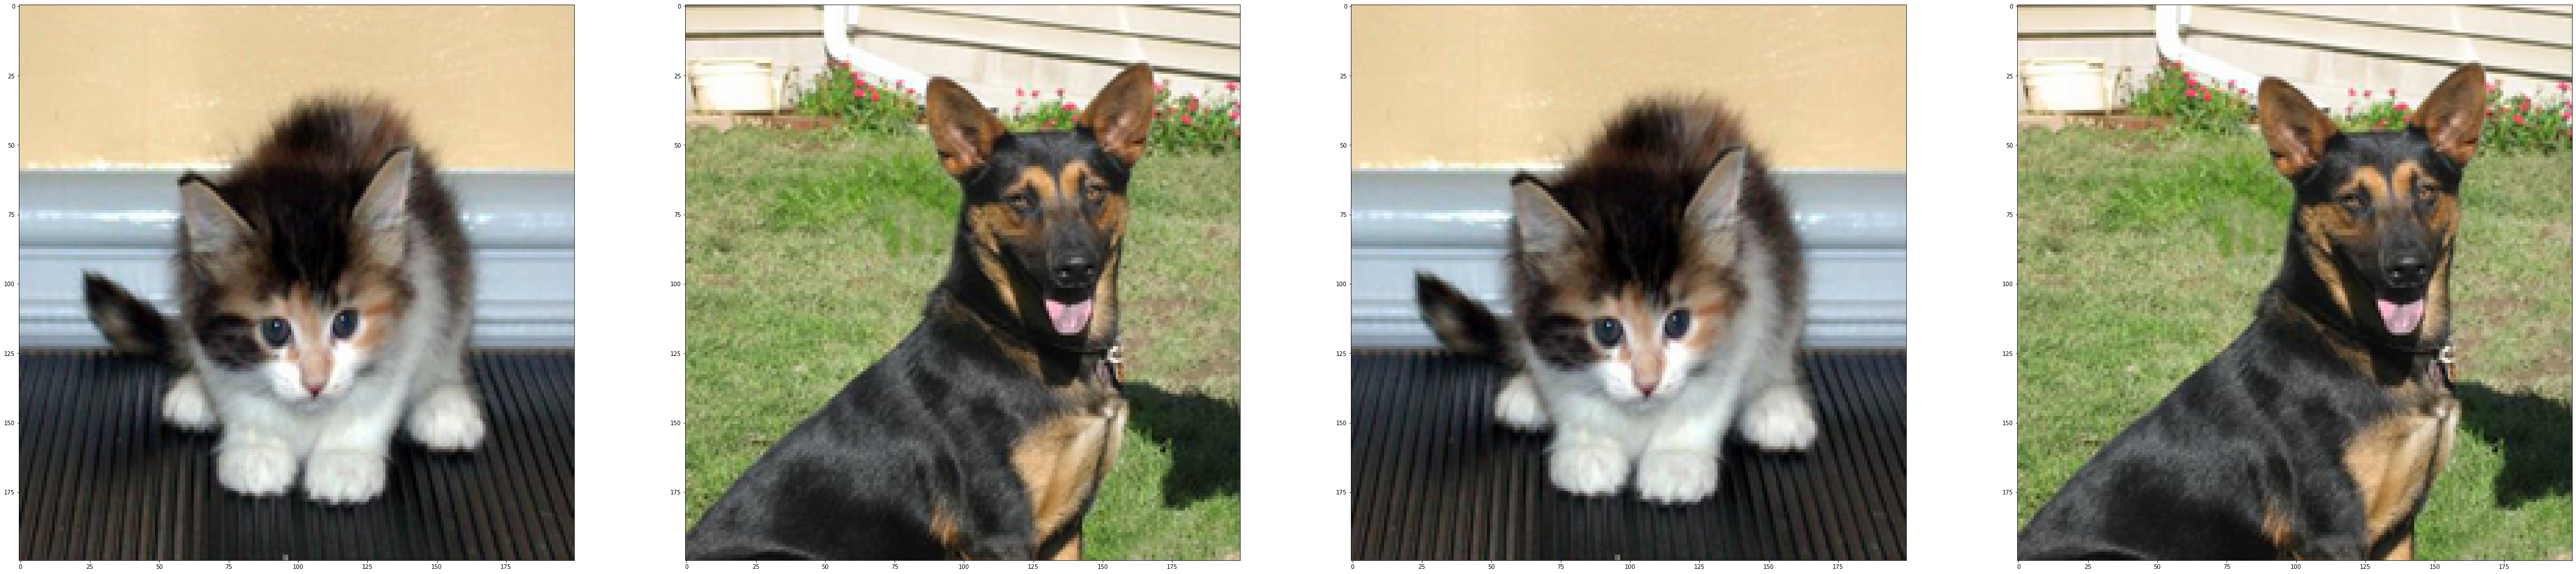

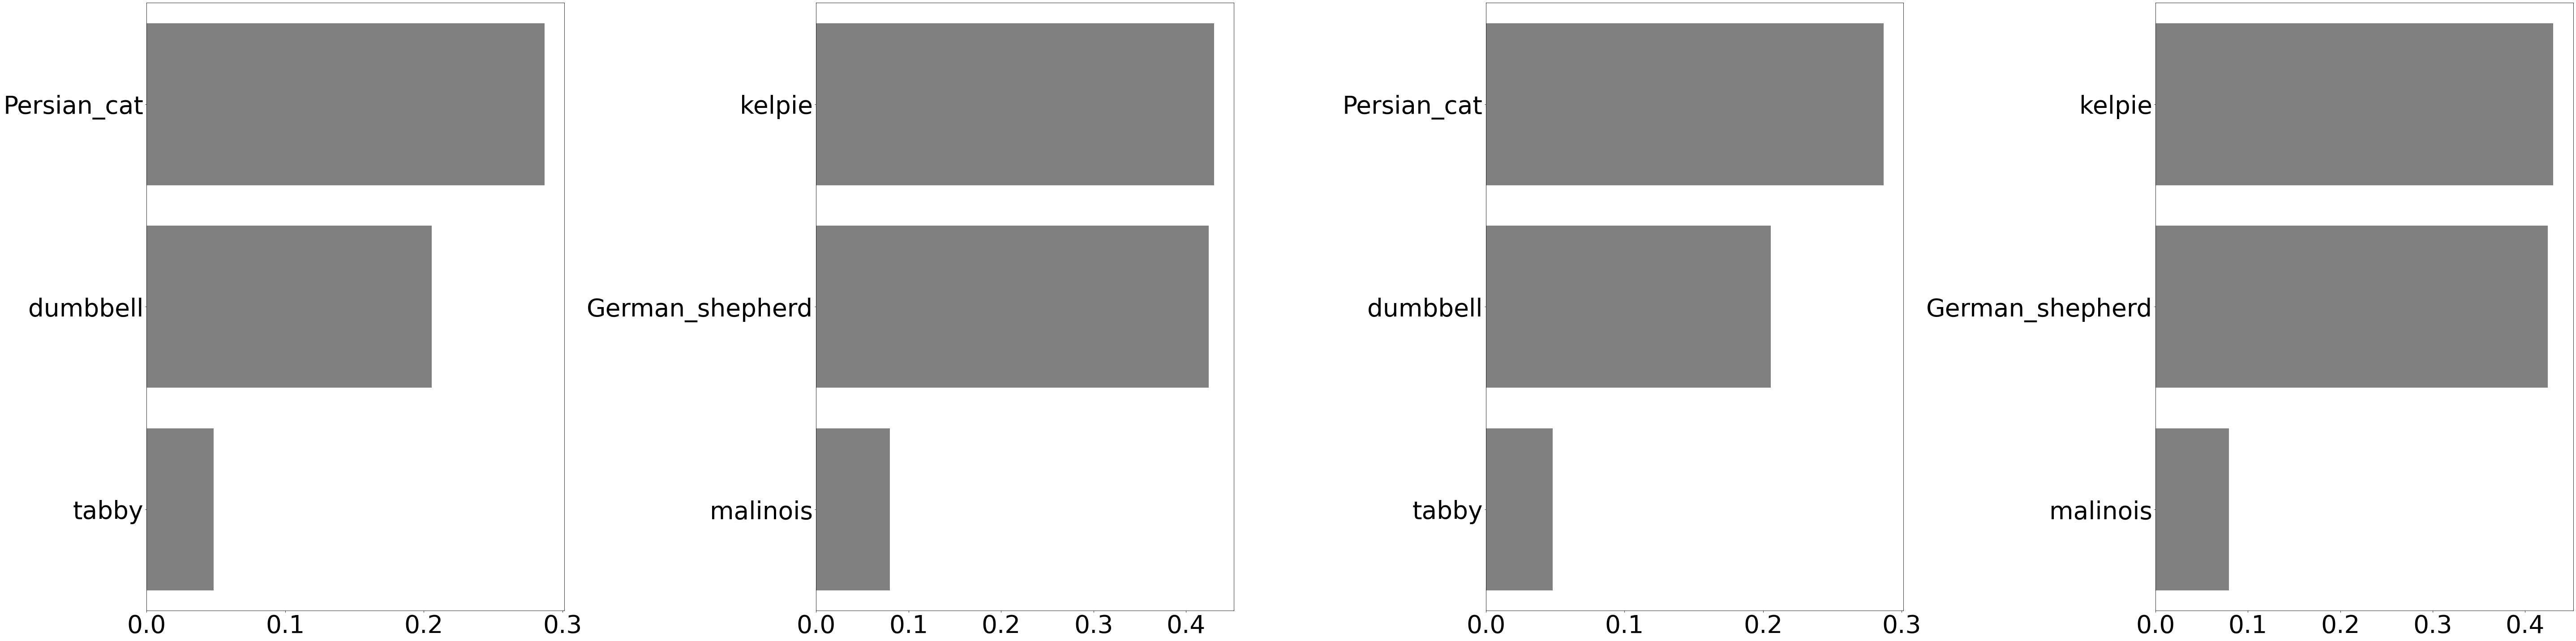

In [ ]:
from keras.applications.vgg19 import VGG19
vgg19_weights = 'dogs-vs-cats-redux-kernels-edition/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
vgg19_model = VGG19(weights=vgg19_weights)
_get_predictions(vgg19_model)

#### 3. InceptionNets

In [ ]:
from keras.applications.inception_v3 import InceptionV3
inception_weights = 'dogs-vs-cats-redux-kernels-edition/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
inception_model = InceptionV3(weights=inception_weights)
_get_predictions(inception_model)

#### 4. ResNets

In [ ]:
from keras.applications.resnet50 import ResNet50
resnet_weights = 'dogs-vs-cats-redux-kernels-edition/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
resnet_model = ResNet50(weights=resnet_weights)
_get_predictions(resnet_model)

#### 5. Feature Extraction USING 위 MODELS

In [ ]:
vgg1616 = VGG16(weights="imagenet", include_top=False)

In [ ]:
def _get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    resnet_features = vgg1616.predict(img_data)
    return resnet_features

img_path = "dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg"
vgg16_features = _get_features(img_path)

In [ ]:
features_representation_1 = vgg16_features.flatten()
features_representation_2 = vgg16_features.squeeze()

print ("Shape 1: ", features_representation_1.shape)
print ("Shape 2: ", features_representation_2.shape)

Shape 1:  (25088,)
Shape 2:  (7, 7, 512)


#### 6. Transfer Learning

In [ ]:
basepath = "dogs-vs-cats-redux-kernels-edition/train/"
class1 = os.listdir(basepath + "dog/")
class2 = os.listdir(basepath + "cat/")

data = {'dog': class1[:10], 
        'cat': class2[:10], 
        'test': [class1[11], class2[11]]}

In [ ]:
features = {"dog" : [], "cat" : [], "test" : []}
testimgs = []
for label, val in data.items():
    for k, each in enumerate(val):        
        if label == "test" and k == 0:
            img_path = basepath + "/dog/" + each
            testimgs.append(img_path)
        elif label == "test" and k == 1:
            img_path = basepath + "/cat/" + each
            testimgs.append(img_path)
        else: 
            img_path = basepath + label.title() + "/" + each
        feats = _get_features(img_path)
        features[label].append(feats.flatten())    

In [ ]:
dataset = pd.DataFrame()
for label, feats in features.items():
    temp_df = pd.DataFrame(feats)
    temp_df['label'] = label
    dataset = dataset.append(temp_df, ignore_index=True)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,13.587858,0.0,0.000000,0.0,0.000000,0.0,dog
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,25.596876,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,2.748579,0.0,0.000000,0.0,dog
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.669233,0.0,0.000000,...,0.129927,1.68268,28.442987,0.000000,0.0,12.339582,0.0,0.000000,0.0,dog
3,0.0,0.0,0.0,0.295240,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,11.455567,0.0,dog
4,0.0,0.0,0.0,6.416512,0.0,0.0,0.0,0.000000,0.0,1.235024,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,dog


In [ ]:
y = dataset[dataset.label != 'test'].label
X = dataset[dataset.label != 'test'].drop('label', axis=1)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

model = MLPClassifier(hidden_layer_sizes=(100, 10))
pipeline = Pipeline([('low_variance_filter', VarianceThreshold()), ('model', model)])
pipeline.fit(X, y)

print ("Model Trained on pre-trained features")

Model Trained on pre-trained features


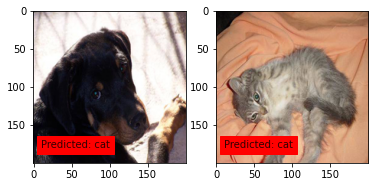

In [ ]:
preds = pipeline.predict(features['test'])

f, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].imshow(Image.open(testimgs[i]).resize((200, 200), Image.ANTIALIAS))
    ax[i].text(10, 180, 'Predicted: %s' % preds[i], color='k', backgroundcolor='red', alpha=0.8)
plt.show()